[*********************100%%**********************]  1 of 1 completed


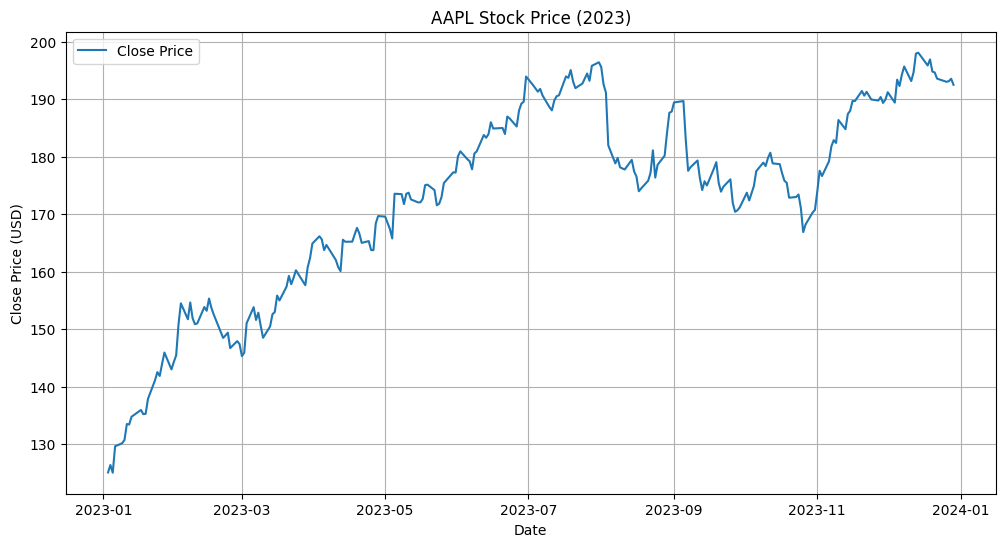

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# 주식 데이터 불러오기 (예: 애플, AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가를 라인 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.title(f"{ticker} Stock Price (2023)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import yfinance as yf
import pandas as pd

# 특정 주식의 티커 심볼 설정 (예: 애플, AAPL)
ticker = yf.Ticker("AAPL")

# 애널리스트 의견 데이터 가져오기
recommendations = ticker.recommendations

# 데이터 프레임의 상위 5개 행 출력 (예시)
print("애널리스트 의견 데이터:\n", recommendations.head())

# CSV로 저장하기를 원할 경우 주석 해제
# recommendations.to_csv("AAPL_analyst_recommendations.csv")


애널리스트 의견 데이터:
   period  strongBuy  buy  hold  sell  strongSell
0     0m         11   21     6     0           0
1    -1m         12   24    11     1           0
2    -2m         12   23    10     1           0
3    -3m         10   24     7     1           0


In [3]:
import yfinance as yf
import pandas as pd
import time

# 종목 티커 리스트 (필요시 위에서 정제된 데이터를 사용하여 직접 입력)
tickers = [
    "NVDA", "NIO", "DJT", "TSLA", "F", "SOFI", "MARA", "AGNC", "SOUN", "LCID", "OKLO", "CLSK", "WULF", "ADT", "AAL", 
    "PLTR", "CX", "NOK", "INTC", "IONQ", "NU", "RIOT", "VALE", "IBRX", "RIVN", "CCL", "PFE", "AMD", "GOOGL", "SMR", 
    "SMCI", "PBR-A", "AAPL", "IREN", "T", "SNAP", "MSTR", "XPEV", "JOBY", "QS", "ITUB", "TSM", "BBD", "AMZN", "GRAB", 
    "BA", "BAC", "RIG", "NYCB", "IQ", "GOOG", "ABEV", "BTE", "BABA", "ON", "GOLD", "ERIC", "PR", "PTON", "HOOD", 
    "WBD", "LYG", "CIG", "JBLU", "BTG", "BEKE", "NBIS", "WBA", "CORZ", "GME", "UMC", "PYPL", "WFC", "NEM", "PBR", 
    "BP", "LUV", "NWL", "JD", "UAA", "TOST", "DAL", "MSFT", "RUN", "CPRI", "KVUE", "IBN", "AVGO", "KGC", "C", "ET", 
    "VZ", "NCLH", "CMG", "LYFT", "ALTM", "TAL", "KMI", "XOM", "KDP"
]

# 애널리스트 의견을 저장할 데이터프레임 생성
all_recommendations = pd.DataFrame()

# 각 종목에 대해 애널리스트 의견 데이터 수집
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        recommendations = stock.recommendations
        
        # 종목 코드 추가
        if recommendations is not None:
            recommendations['Ticker'] = ticker
            all_recommendations = pd.concat([all_recommendations, recommendations])
        
        print(f"Successfully fetched recommendations for {ticker}")
        
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    
    # 데이터 수집에 지연 시간을 추가하여 Yahoo Finance 서버에 부하를 줄이기 (권장)
    time.sleep(1)

# 데이터프레임 결과 출력 (상위 5개)
print("Collected Analyst Recommendations:")
print(all_recommendations.head())

# 최종 데이터프레임은 `all_recommendations` 변수에 저장됩니다.


Successfully fetched recommendations for NVDA
Successfully fetched recommendations for NIO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DJT?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=DJT&crumb=fWGSLjllPdJ


Successfully fetched recommendations for DJT
Successfully fetched recommendations for TSLA
Successfully fetched recommendations for F
Successfully fetched recommendations for SOFI
Successfully fetched recommendations for MARA
Successfully fetched recommendations for AGNC
Successfully fetched recommendations for SOUN
Successfully fetched recommendations for LCID
Successfully fetched recommendations for OKLO
Successfully fetched recommendations for CLSK
Successfully fetched recommendations for WULF
Successfully fetched recommendations for ADT
Successfully fetched recommendations for AAL
Successfully fetched recommendations for PLTR
Successfully fetched recommendations for CX
Successfully fetched recommendations for NOK
Successfully fetched recommendations for INTC
Successfully fetched recommendations for IONQ
Successfully fetched recommendations for NU
Successfully fetched recommendations for RIOT
Successfully fetched recommendations for VALE
Successfully fetched recommendations for IBRX

In [4]:
# 결측치 제거
all_recommendations_cleaned = all_recommendations.dropna()

# 결측치 제거 후 데이터프레임 결과 출력 (상위 5개)
print("Collected Analyst Recommendations after Cleaning:")
print(all_recommendations_cleaned.head())

# 최종 클린 데이터프레임은 `all_recommendations_cleaned` 변수에 저장됩니다.


Collected Analyst Recommendations after Cleaning:
  period  strongBuy   buy  hold  sell  strongSell Ticker
0     0m        7.0  14.0  15.0   1.0         1.0   NVDA
1    -1m       21.0  38.0   5.0   0.0         0.0   NVDA
2    -2m       18.0  37.0   5.0   0.0         0.0   NVDA
3    -3m       12.0  21.0  12.0   2.0         0.0   NVDA
0     0m        1.0   2.0   5.0   0.0         0.0    NIO


In [5]:
# 최근 데이터('0m')만 필터링
current_recommendations = all_recommendations_cleaned[all_recommendations_cleaned['period'] == '0m']

# strongBuy 수를 기준으로 정렬하여 상위 10개 추출
top_10_strong_buy = current_recommendations.sort_values(by='strongBuy', ascending=False).head(10)

# 결과 출력
print("Top 10 Tickers by Strong Buy Recommendations:")
print(top_10_strong_buy[['Ticker', 'strongBuy']])


Top 10 Tickers by Strong Buy Recommendations:
  Ticker  strongBuy
0   BABA       18.0
0   AMZN       15.0
0   MSFT       14.0
0   PYPL       14.0
0  GOOGL       13.0
0   AAPL       11.0
0   NCLH       10.0
0     JD       10.0
0   AVGO       10.0
0    CCL        9.0




1. **BABA** - Alibaba Group Holding Limited  
   - 중국의 대표적인 전자상거래 및 클라우드 컴퓨팅 기업. 온라인 마켓플레이스, 클라우드 컴퓨팅, 디지털 미디어 및 엔터테인먼트 분야에서 사업을 운영.

2. **AMZN** - Amazon.com, Inc.  
   - 미국의 세계 최대 전자상거래 및 클라우드 컴퓨팅 회사. 온라인 소매, 클라우드 서비스, 스트리밍, 인공지능 등의 다양한 분야에서 활동.

3. **MSFT** - Microsoft Corporation  
   - 미국의 다국적 기술 회사. 운영체제(Windows), 소프트웨어(Office), 클라우드 서비스(Azure), 게임(Xbox) 등 다양한 기술 제품과 서비스를 제공.

4. **PYPL** - PayPal Holdings, Inc.  
   - 미국의 디지털 결제 플랫폼 제공 기업. 전 세계적으로 온라인 송금 및 결제 서비스를 운영하며, 개인 및 기업 모두에게 결제 솔루션을 제공.

5. **GOOGL** - Alphabet Inc.  
   - 구글(Google)의 모회사로, 검색엔진, 디지털 광고, 클라우드 서비스, 모바일 운영체제(Android), 유튜브 등의 다양한 사업을 운영.

6. **AAPL** - Apple Inc.  
   - 미국의 다국적 기술 회사. iPhone, iPad, Mac, Apple Watch, Apple TV 등 혁신적인 하드웨어 제품과 iOS, macOS 등의 소프트웨어를 제공.

7. **NCLH** - Norwegian Cruise Line Holdings Ltd.  
   - 미국의 크루즈 여행사. Norwegian Cruise Line, Oceania Cruises, Regent Seven Seas Cruises 등의 브랜드를 보유하며 세계적인 크루즈 서비스를 제공.

8. **JD** - JD.com, Inc.  
   - 중국의 주요 전자상거래 기업으로, 광범위한 제품을 온라인에서 판매. 물류 및 AI 분야에서도 혁신적인 서비스를 제공.

9. **AVGO** - Broadcom Inc.  
   - 미국의 반도체 및 인프라 소프트웨어 솔루션 기업. 무선, 네트워킹, 스토리지 및 산업 응용 분야의 다양한 반도체 제품을 제조.

10. **CCL** - Carnival Corporation & plc  
    - 세계 최대의 크루즈 여행사 중 하나. Carnival Cruise Line, Princess Cruises, Holland America Line 등 다양한 크루즈 브랜드를 운영.


# 각 종목에 대해 weighted_score = (2 * strongBuy) + buy를 계산

In [6]:
import pandas as pd

# 각 시점(-3m, -2m, -1m, 0m)에서 포트폴리오 구성
portfolio_periods = {}

# 데이터프레임의 각 시점에 대해 반복
for period in ['-3m', '-2m', '-1m', '0m']:
    # 특정 시점의 데이터만 필터링
    period_data = all_recommendations_cleaned[all_recommendations_cleaned['period'] == period].copy()
    
    # 가중치 점수 계산 (2배의 strongBuy + Buy)
    period_data['weighted_score'] = (2 * period_data['strongBuy']) + period_data['buy']
    
    # 가중치 점수를 기준으로 정렬하여 상위 종목 선택 (여기서는 상위 10개를 포트폴리오로 선택)
    top_portfolio = period_data.sort_values(by='weighted_score', ascending=False).head(10)
    
    # 각 시점별로 포트폴리오 저장
    portfolio_periods[period] = top_portfolio[['Ticker', 'strongBuy', 'buy', 'weighted_score']]

# 각 시점별 포트폴리오 결과 출력
for period, portfolio in portfolio_periods.items():
    print(f"\nOptimal Portfolio for {period}:")
    print(portfolio)



Optimal Portfolio for -3m:
  Ticker  strongBuy   buy  weighted_score
3   AMZN       17.0  42.0            76.0
3   MSFT       20.0  27.0            67.0
3   BABA       16.0  29.0            61.0
3  GOOGL       15.0  29.0            59.0
3   NVDA       12.0  21.0            45.0
3   AAPL       10.0  24.0            44.0
3    AMD       12.0  19.0            43.0
3     JD        9.0  22.0            40.0
3   SNAP       10.0  20.0            40.0
3    NIO        8.0  19.0            35.0

Optimal Portfolio for -2m:
  Ticker  strongBuy   buy  weighted_score
2   AMZN       17.0  43.0            77.0
2   MSFT       21.0  34.0            76.0
2   NVDA       18.0  37.0            73.0
2  GOOGL       15.0  29.0            59.0
2    AMD       16.0  26.0            58.0
2   BABA       14.0  27.0            55.0
2   AAPL       12.0  23.0            47.0
2   AVGO        9.0  26.0            44.0
2     JD        9.0  23.0            41.0
2    CMG       14.0  10.0            38.0

Optimal Portfolio f

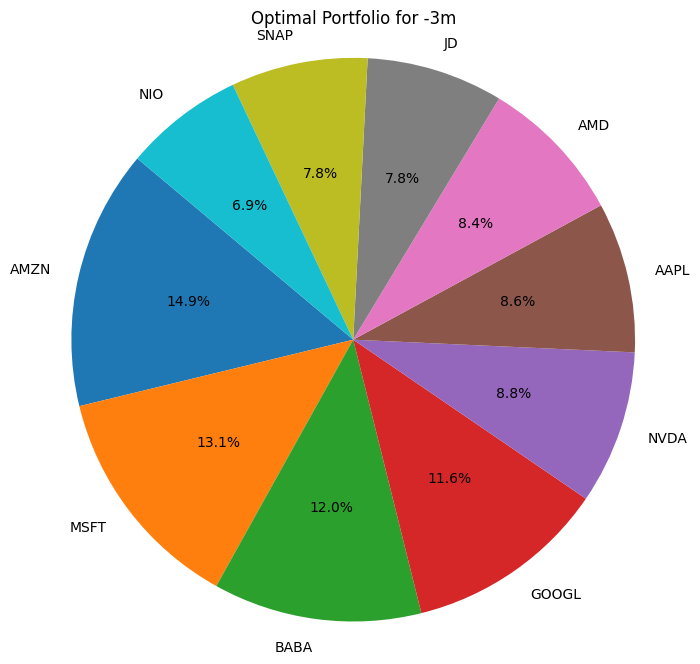

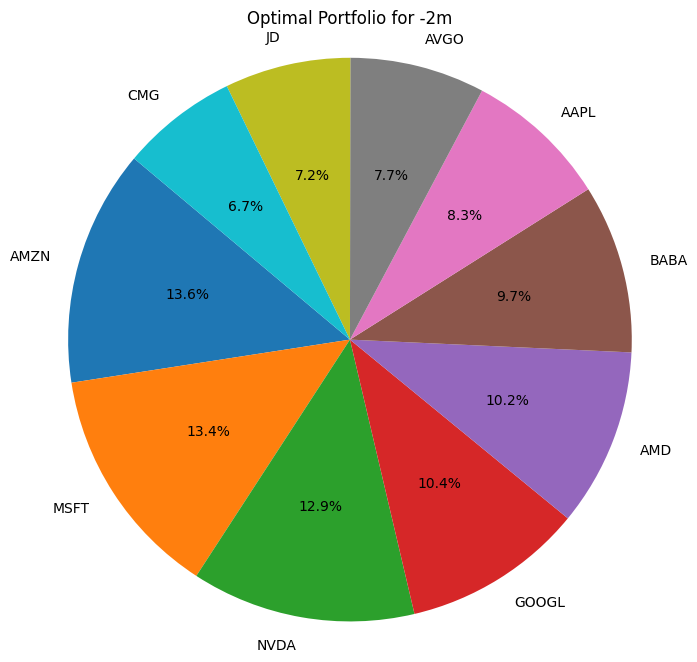

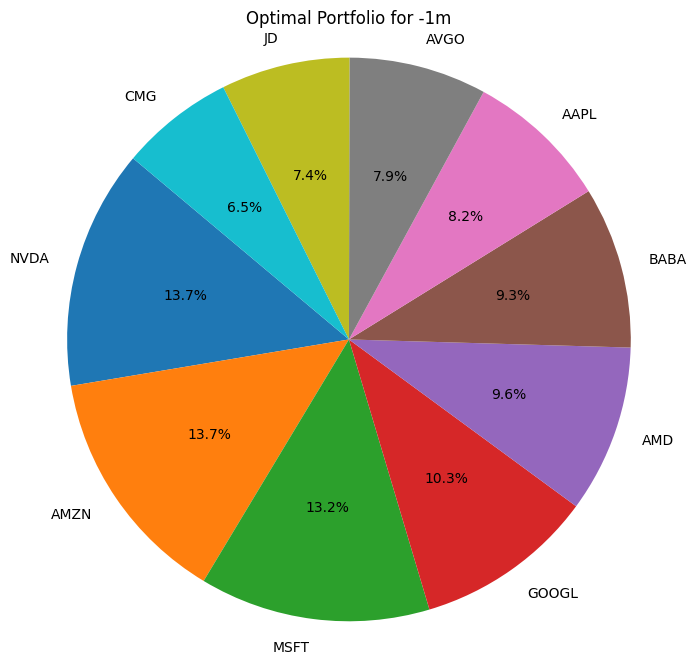

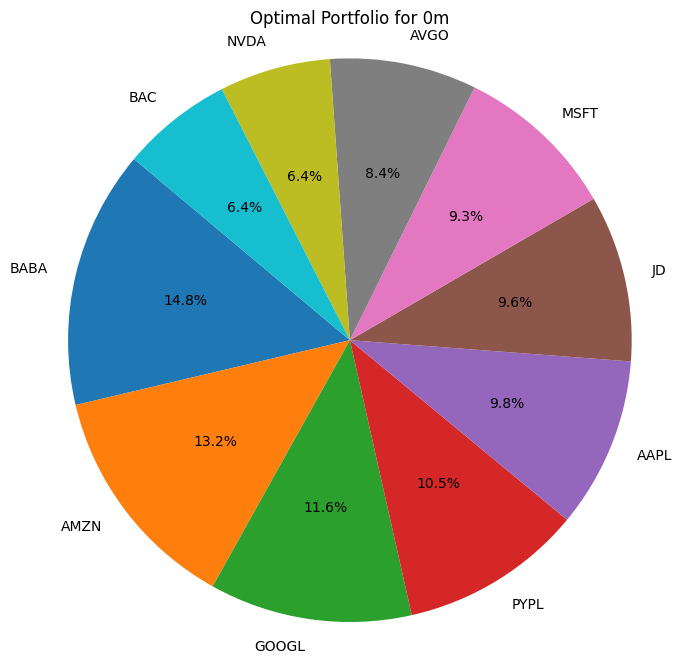

In [7]:
import matplotlib.pyplot as plt

# 각 시점별 포트폴리오를 원형 차트로 시각화
for period, portfolio in portfolio_periods.items():
    # 포트폴리오 데이터
    tickers = portfolio['Ticker']
    weights = portfolio['weighted_score']
    
    # 원형 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=140)
    plt.title(f"Optimal Portfolio for {period}")
    plt.axis('equal')  # 원형으로 표시
    plt.show()


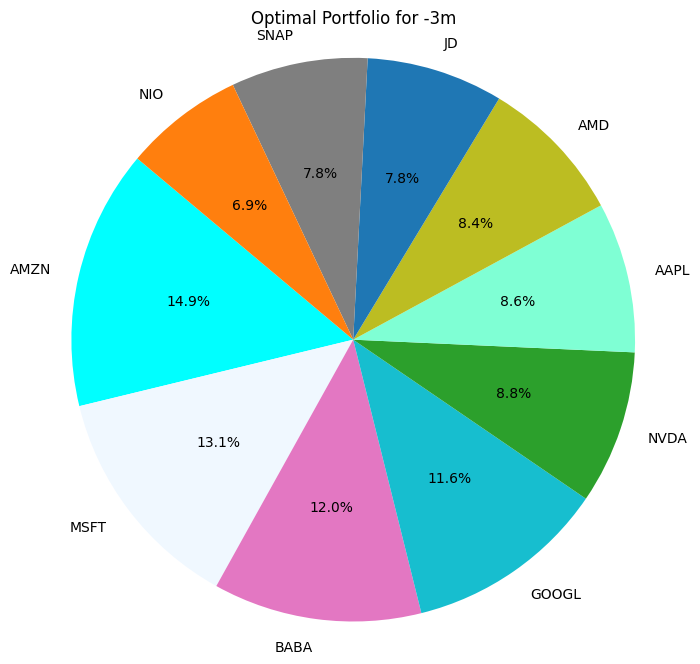

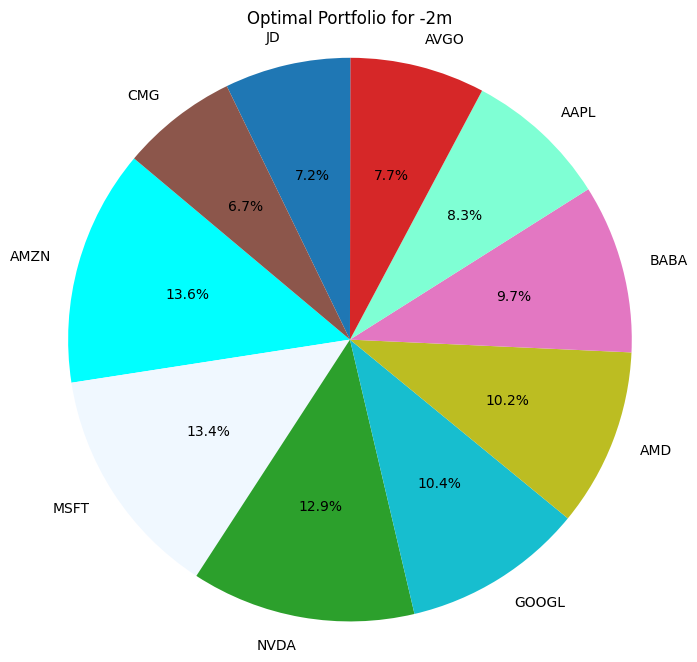

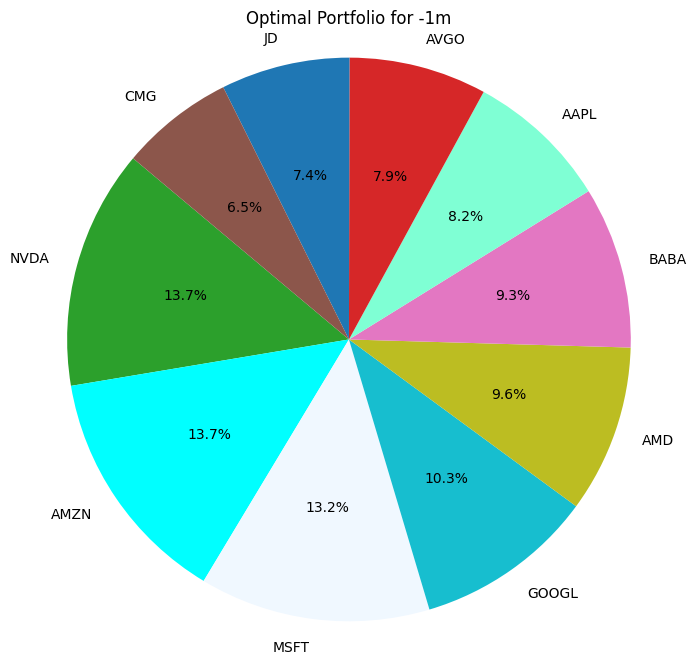

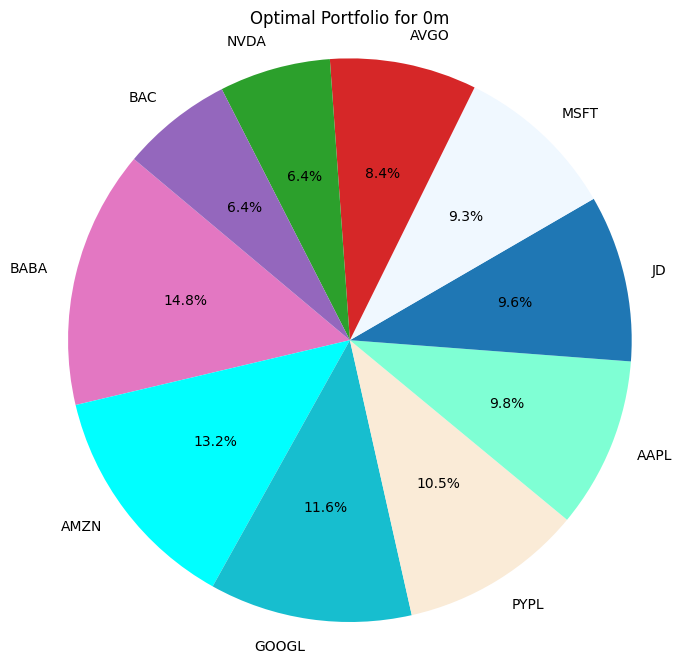

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 전체 포트폴리오에서 등장한 모든 티커에 대해 고유 색상을 설정
unique_tickers = set()
for period, portfolio in portfolio_periods.items():
    unique_tickers.update(portfolio['Ticker'])

# 고유 색상 맵핑 생성
colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.CSS4_COLORS)  # 사용할 색상 리스트
ticker_color_map = {ticker: colors[i % len(colors)] for i, ticker in enumerate(unique_tickers)}

# 각 시점별 포트폴리오를 원형 차트로 시각화
for period, portfolio in portfolio_periods.items():
    # 포트폴리오 데이터
    tickers = portfolio['Ticker']
    weights = portfolio['weighted_score']
    
    # 각 티커에 대한 색상 리스트 생성
    pie_colors = [ticker_color_map[ticker] for ticker in tickers]
    
    # 원형 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    plt.title(f"Optimal Portfolio for {period}")
    plt.axis('equal')  # 원형으로 표시
    plt.show()


In [8]:
# 각 시점별 포트폴리오의 티커를 집합으로 저장
tickers_3m = set(portfolio_periods['-3m']['Ticker'])
tickers_2m = set(portfolio_periods['-2m']['Ticker'])
tickers_1m = set(portfolio_periods['-1m']['Ticker'])
tickers_0m = set(portfolio_periods['0m']['Ticker'])

# 모든 시점에서 공통으로 등장하는 종목 찾기
common_tickers = tickers_3m & tickers_2m & tickers_1m & tickers_0m

# 공통으로 남아있는 종목 출력
print("Tickers present in all periods (-3m, -2m, -1m, 0m):")
print(common_tickers)

# 공통 종목의 개수
print(f"Number of common tickers: {len(common_tickers)}")


Tickers present in all periods (-3m, -2m, -1m, 0m):
{'JD', 'NVDA', 'BABA', 'GOOGL', 'MSFT', 'AMZN', 'AAPL'}
Number of common tickers: 7


1. **JD** - *JD.com, Inc.*  
   - 중국의 주요 전자상거래 기업 중 하나로, 다양한 제품을 온라인으로 판매합니다. JD.com은 광범위한 물류 네트워크를 보유하고 있으며, 신속한 배송 서비스로 잘 알려져 있습니다.

2. **NVDA** - *NVIDIA Corporation*  
   - 그래픽 처리 장치(GPU) 분야의 글로벌 리더로, 고성능 GPU를 제조하며 인공지능(AI), 데이터 센터, 게이밍, 자율주행 등 다양한 분야에서 혁신적인 기술을 제공합니다.

3. **BABA** - *Alibaba Group Holding Limited*  
   - 중국의 대표적인 전자상거래 및 클라우드 컴퓨팅 기업입니다. 타오바오(Taobao)와 티몰(Tmall) 같은 온라인 마켓플레이스를 운영하며, 클라우드 서비스 및 디지털 미디어 분야에서도 큰 영향력을 발휘하고 있습니다.

4. **GOOGL** - *Alphabet Inc.*  
   - 구글(Google)의 모회사로, 검색엔진, 디지털 광고, 클라우드 서비스, 모바일 운영체제(Android), 유튜브 등의 다양한 사업을 운영하고 있습니다. 인터넷 관련 서비스에서 세계적인 선두주자입니다.

5. **MSFT** - *Microsoft Corporation*  
   - 소프트웨어와 클라우드 서비스의 글로벌 리더입니다. Windows 운영체제, Office 소프트웨어, Azure 클라우드 서비스, Xbox 게임 콘솔 등 다양한 기술 제품과 서비스를 제공합니다.

6. **AMZN** - *Amazon.com, Inc.*  
   - 세계 최대의 전자상거래 및 클라우드 컴퓨팅 회사로, 온라인 소매부터 AWS 클라우드 서비스, 인공지능, 스트리밍 서비스까지 다양한 분야에서 사업을 운영하고 있습니다.

7. **AAPL** - *Apple Inc.*  
   - 아이폰, 아이패드, 맥북 등 혁신적인 하드웨어와 iOS, macOS 등의 소프트웨어를 제공하는 글로벌 기술 기업입니다. 소비자 가전 및 소프트웨어 생태계에서 높은 브랜드 충성도를 자랑합니다.


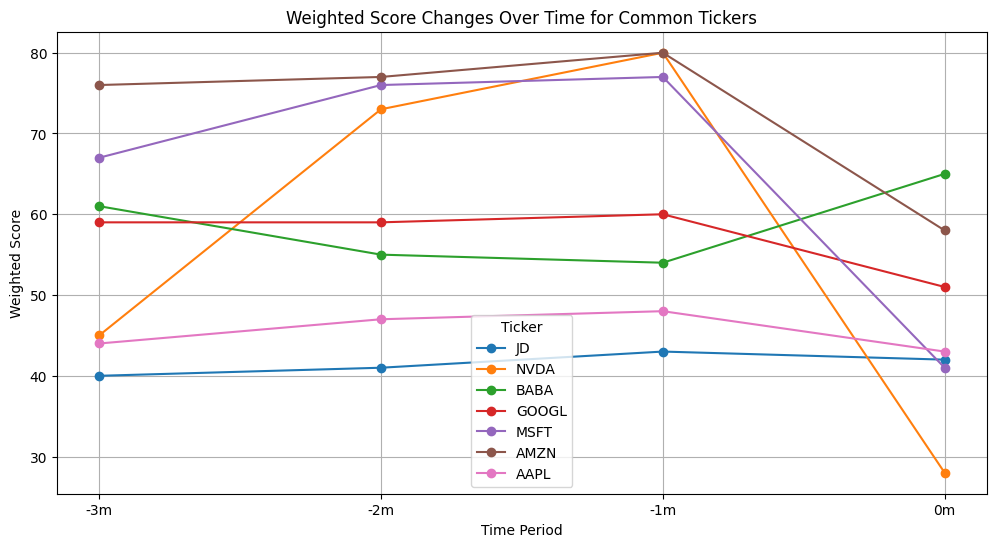

In [9]:
import matplotlib.pyplot as plt

# 공통으로 등장한 종목 리스트
common_tickers = ['JD', 'NVDA', 'BABA', 'GOOGL', 'MSFT', 'AMZN', 'AAPL']

# 각 종목에 대해 시계열 데이터를 생성
time_periods = ['-3m', '-2m', '-1m', '0m']
scores_over_time = {ticker: [] for ticker in common_tickers}

for period in time_periods:
    # 해당 시점의 데이터프레임에서 공통 종목들의 점수 추출
    for ticker in common_tickers:
        # 현재 시점의 포트폴리오에서 티커에 해당하는 행을 찾기
        score = portfolio_periods[period].loc[portfolio_periods[period]['Ticker'] == ticker, 'weighted_score']
        # 점수가 존재하면 추가, 없으면 0으로 추가
        scores_over_time[ticker].append(score.values[0] if not score.empty else 0)

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
for ticker in common_tickers:
    plt.plot(time_periods, scores_over_time[ticker], marker='o', label=ticker)

plt.title("Weighted Score Changes Over Time for Common Tickers")
plt.xlabel("Time Period")
plt.ylabel("Weighted Score")
plt.legend(title="Ticker")
plt.grid(True)
plt.show()


In [1]:
import yfinance as yf
import pandas as pd

# ETF 티커 리스트 (예시)
etf_tickers = ["SPY", "IVV", "VOO", "QQQ", "DIA"]  # S&P 500, Nasdaq, Dow Jones 관련 ETF 티커

# ETF 애널리스트 의견을 저장할 데이터프레임 생성
etf_recommendations = pd.DataFrame()

# 각 ETF에 대해 애널리스트 의견 데이터 수집
for ticker in etf_tickers:
    try:
        etf = yf.Ticker(ticker)
        recommendations = etf.recommendations
        
        # 종목 코드 추가
        if recommendations is not None:
            recommendations['Ticker'] = ticker
            etf_recommendations = pd.concat([etf_recommendations, recommendations])
        
        print(f"Successfully fetched recommendations for {ticker}")
        
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# 결과 확인
print("ETF Analyst Recommendations:")
print(etf_recommendations.head())


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPY?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=SPY&crumb=fWGSLjllPdJ


Successfully fetched recommendations for SPY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVV?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=IVV&crumb=fWGSLjllPdJ


Successfully fetched recommendations for IVV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VOO?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=VOO&crumb=fWGSLjllPdJ


Successfully fetched recommendations for VOO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/QQQ?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=QQQ&crumb=fWGSLjllPdJ


Successfully fetched recommendations for QQQ


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DIA?modules=recommendationTrend&corsDomain=finance.yahoo.com&formatted=false&symbol=DIA&crumb=fWGSLjllPdJ


Successfully fetched recommendations for DIA
ETF Analyst Recommendations:
Empty DataFrame
Columns: [Ticker]
Index: []
